# Deep Learning Models: CNN, RNN, and MLP on the MNIST Dataset

## 1. Importing Libraries and Loading Dataset

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 2. Data Exploration

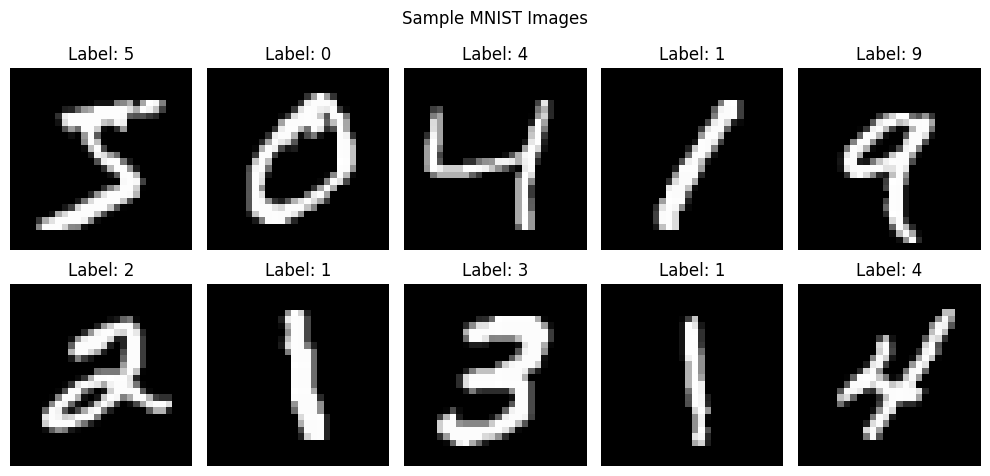

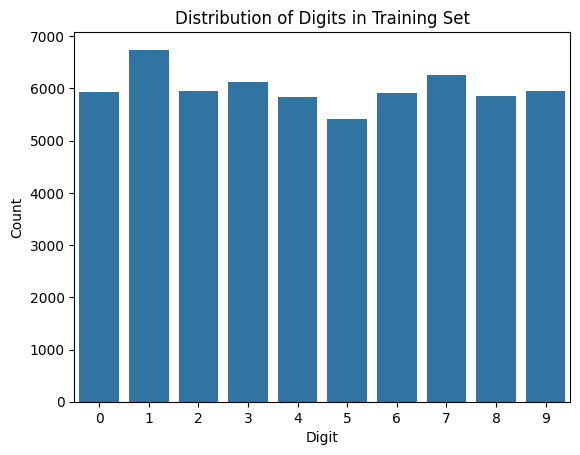

In [2]:
# Display sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.suptitle("Sample MNIST Images")
plt.tight_layout()
plt.show()

# Distribution of target labels
sns.countplot(x=y_train)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

# Preprocessing
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode target
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 3. CNN Model

In [3]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
cnn_eval = cnn_model.evaluate(X_test, y_test)
print("CNN Test Accuracy:", cnn_eval[1])


Epoch 1/5


/Users/fahee/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8786 - loss: 0.3967 - val_accuracy: 0.9847 - val_loss: 0.0537
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9837 - loss: 0.0523 - val_accuracy: 0.9870 - val_loss: 0.0497
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9895 - loss: 0.0324 - val_accuracy: 0.9897 - val_loss: 0.0363
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9925 - loss: 0.0236 - val_accuracy: 0.9895 - val_loss: 0.0354
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9945 - loss: 0.0175 - val_accuracy: 0.9910 - val_loss: 0.0304
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9897 - loss: 0.0301
CNN Test Accuracy: 0.9921000003814697


## 4. RNN Model

In [4]:
# Reshape data for RNN
X_train_rnn = X_train.reshape(-1, 28, 28)
X_test_rnn = X_test.reshape(-1, 28, 28)

rnn_model = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=64, validation_split=0.1)
rnn_eval = rnn_model.evaluate(X_test_rnn, y_test)
print("RNN Test Accuracy:", rnn_eval[1])

Epoch 1/5


/Users/fahee/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6952 - loss: 0.8528 - val_accuracy: 0.9160 - val_loss: 0.2773
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9395 - loss: 0.2110 - val_accuracy: 0.9557 - val_loss: 0.1466
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9495 - loss: 0.1694 - val_accuracy: 0.9717 - val_loss: 0.1003
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9585 - loss: 0.1435 - val_accuracy: 0.9688 - val_loss: 0.1088
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9640 - loss: 0.1224 - val_accuracy: 0.9617 - val_loss: 0.1184
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9592 - loss: 0.1427
RNN Test Accuracy: 0.9635999798774719


## 5. MLP Model

In [5]:
X_train_mlp = X_train.reshape(-1, 28 * 28)
X_test_mlp = X_test.reshape(-1, 28 * 28)

mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(28 * 28,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_history = mlp_model.fit(X_train_mlp, y_train, epochs=5, batch_size=64, validation_split=0.1)
mlp_eval = mlp_model.evaluate(X_test_mlp, y_test)
print("MLP Test Accuracy:", mlp_eval[1])

Epoch 1/5


/Users/fahee/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8697 - loss: 0.4508 - val_accuracy: 0.9687 - val_loss: 0.1115
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9678 - loss: 0.1013 - val_accuracy: 0.9733 - val_loss: 0.0942
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9797 - loss: 0.0645 - val_accuracy: 0.9760 - val_loss: 0.0780
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9859 - loss: 0.0437 - val_accuracy: 0.9782 - val_loss: 0.0776
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9896 - loss: 0.0340 - val_accuracy: 0.9793 - val_loss: 0.0747
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.9722 - loss: 0.0992
MLP Test Accuracy: 0.9765999913215637


## 6. Evaluation and Results

In [6]:
cnn_pred = np.argmax(cnn_model.predict(X_test), axis=1)
rnn_pred = np.argmax(rnn_model.predict(X_test_rnn), axis=1)
mlp_pred = np.argmax(mlp_model.predict(X_test_mlp), axis=1)

y_test_labels = np.argmax(y_test, axis=1)

print("CNN Classification Report:")
print(classification_report(y_test_labels, cnn_pred))
print("\nRNN Classification Report:")
print(classification_report(y_test_labels, rnn_pred))
print("\nMLP Classification Report:")
print(classification_report(y_test_labels, mlp_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


RNN Classification Report:
              precision    recall  f1-score   support

      

## 7. ROC Curve Plotting Code

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


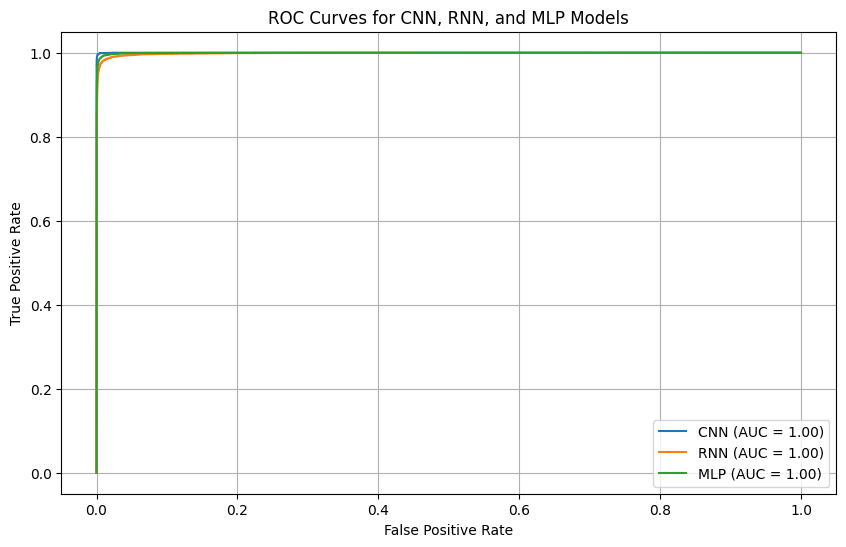

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_probs, model_name):
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_probs.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Generate predictions for ROC curves
cnn_pred_probs = cnn_model.predict(X_test)  # Probabilities for CNN
rnn_pred_probs = rnn_model.predict(X_test_rnn)  # Probabilities for RNN
mlp_pred_probs = mlp_model.predict(X_test_mlp)  # Probabilities for MLP

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
plot_roc_curve(y_test, cnn_pred_probs, "CNN")
plot_roc_curve(y_test, rnn_pred_probs, "RNN")
plot_roc_curve(y_test, mlp_pred_probs, "MLP")

plt.title("ROC Curves for CNN, RNN, and MLP Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()